In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import matplotlib.pyplot as plt

In [6]:
movies_df = pd.read_csv(r"C:\Users\DELL\Downloads\movies.csv")
ratings_df = pd.read_csv(r"C:\Users\DELL\Downloads\ratings.csv")
users_df = pd.read_csv(r"C:\Users\DELL\Downloads\users.csv")

User Ratings of "Toy Story" and Bar Chart

In [7]:
toy_story_id = movies_df[movies_df['Title'].str.contains("Toy Story")]['MovieID'].values[0]
toy_story_ratings = ratings_df[ratings_df['MovieID'] == toy_story_id]['Rating']


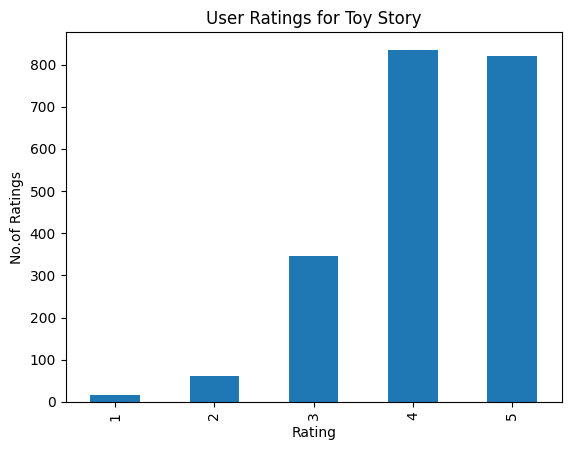

In [30]:
toy_story_rating_counts = toy_story_ratings.value_counts().sort_index()
toy_story_rating_counts.plot(kind='bar',
                            xlabel='Rating', 
                            ylabel='No.of Ratings', 
                            title='User Ratings for Toy Story')
plt.show()

Top 10 movies by viewership ratings

In [31]:
merged_df = movies_df.merge(ratings_df, on='MovieID')
ratings = merged_df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)
ratings = ratings.astype(int)
print("Top 10 Movies by Rating:")
print(ratings)

Top 10 Movies by Rating:
Title
Ulysses (Ulisse) (1954)                      5
Lured (1947)                                 5
Follow the Bitch (1998)                      5
Bittersweet Motel (2000)                     5
Song of Freedom (1936)                       5
One Little Indian (1973)                     5
Smashing Time (1967)                         5
Schlafes Bruder (Brother of Sleep) (1995)    5
Gate of Heavenly Peace, The (1995)           5
Baby, The (1973)                             5
Name: Rating, dtype: int32


Ratings for movies reviewed by a specific user

In [32]:
ratings_df['UserID'].unique()

array([   1,    2,    3, ..., 6038, 6039, 6040], dtype=int64)

In [37]:
user_id = int(input("Enter User ID: "))  
user_ratings = ratings_df[ratings_df['UserID'] == user_id].merge(movies_df, on='MovieID')

print("Ratings for User {user_id}:")
print(user_ratings[['Title', 'Rating']])

Ratings for User {user_id}:
                                                Title  Rating
0                                    Walkabout (1971)       4
1                           Gone with the Wind (1939)       3
2                                       Harvey (1950)       5
3                          Eat Drink Man Woman (1994)       4
4              Monty Python and the Holy Grail (1974)       4
5                          Wrong Trousers, The (1993)       5
6                         English Patient, The (1996)       5
7                              St. Elmo's Fire (1985)       4
8                                  Auntie Mame (1958)       4
9                                 Forrest Gump (1994)       4
10  Star Wars: Episode VI - Return of the Jedi (1983)       4
11                            Grand Day Out, A (1992)       5
12                              Cool Hand Luke (1967)       3
13                         Room with a View, A (1986)       5
14                          Breaking the W

In [34]:
genre_counts = movies_df['Genres'].str.split('|').explode().value_counts()

print("Unique Genres and Movie Counts:")
print(genre_counts)

Unique Genres and Movie Counts:
Genres
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: count, dtype: int64
